In [1]:
import cv2
import os
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

**Detecting Face on Single Image**

2/2 [==============================] - 0s 4ms/step


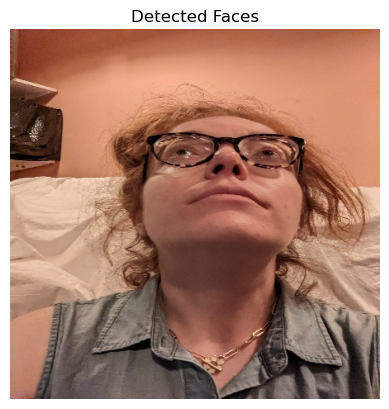

In [14]:
# Load an image
# image_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data\\subject_0\\PXL_20220922_132845778.PORTRAIT.jpg'
image_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized\\1_PXL_20220922_163158577.jpg'

# Destination Folder
# destination_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst_faces'
destination_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB for matplotlib

# Create MTCNN detector
detector = MTCNN()

# Detect faces
faces = detector.detect_faces(image)

# Draw bounding boxes on the image
for face in faces:
    bounding_box = face['box']
    cv2.rectangle(
        image_rgb,
        (bounding_box[0], bounding_box[1]),
        (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
        (0, 255, 0),  # BGR color format: Green color
        1  # Thickness of the rectangle
    )

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Detected Faces')
plt.show()

**Extracting All Face to seperate Folder**

In [15]:
# Load an image
# source_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data\\subject_0\\PXL_20220922_132845778.PORTRAIT.jpg' change this to resized folder directory
source_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized'

# Destination Folder
# destination_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst_faces'
destination_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'

# Create destination Folder if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Create MTCNN detector
detector = MTCNN()

# Iterate through each file in the source directory
for filename in os.listdir(source_directory):
    image_path = os.path.join(source_directory, filename)

    # Ensure the file is an image (you can add more specific image formats if needed)
    if os.path.isfile(image_path) and any(image_path.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png']):
        image = cv2.imread(image_path)

        # Detect faces
        faces = detector.detect_faces(image)

        # Extracting Face to folder
        if len(faces) > 0:
            largest_face = max(faces, key=lambda f: f['box'][2] * f['box'][3])
            x, y, w, h = largest_face['box']

            min_face_size = 30
            if w > min_face_size and h > min_face_size:
                face = image[y:y + h, x:x + w]

                extracted_face_filename = f'{os.path.splitext(filename)[0]}.jpg'
                extracted_face_path = os.path.join(destination_directory, extracted_face_filename)

                cv2.imwrite(extracted_face_path, face)
            else:
                print(f"Face in {filename} is too small and will be skipped.")
        else:
            
            print(f"No face detected in {filename}.")

print("Face extraction complete!")


2/2 [==============================] - 0s 4ms/step
No face detected in 10_PXL_20220922_175143920.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_PXL_20220922_175221016.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_PXL_20220922_175328231.jpg.
1/1 [==============================] - 0s 19ms/step
No face detected in 10_PXL_20220922_175608493.jpg.
1/1 [==============================] - 0s 19ms/step
No face detected in 10_PXL_20220922_175613080.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_PXL_20220922_175717675.jpg.
1/1 [==============================] - 0s 19ms/step
No face detected in 10_PXL_20220922_175816268.jpg.
1/1 [==============================] - 0s 21ms/step
No face detected in 10_PXL_20220922_175827000.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_PXL_20220922_175834037.jpg.
1/1 [==============================] - 0s 21ms/step
No face detected in 10